In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = data.drop(['CustomerID','Gender'],axis=1)
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


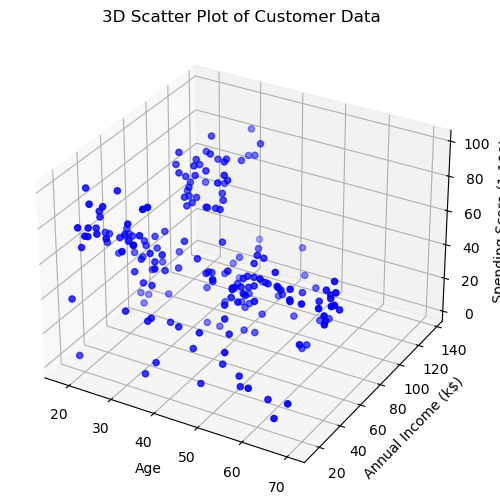

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'], c='blue', marker='o')

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data[:5])

[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


C:\Users\darlis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\darlis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\darlis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\darlis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

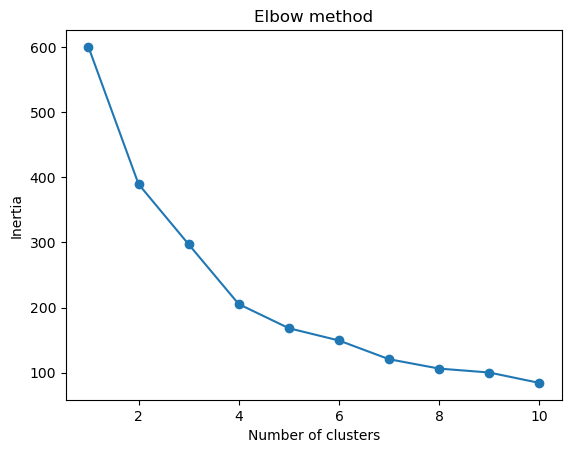

In [6]:
# Elbow Method
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [7]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

data.head()

C:\Users\darlis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,2
2,20,16,6,2
3,23,16,77,2
4,31,17,40,2


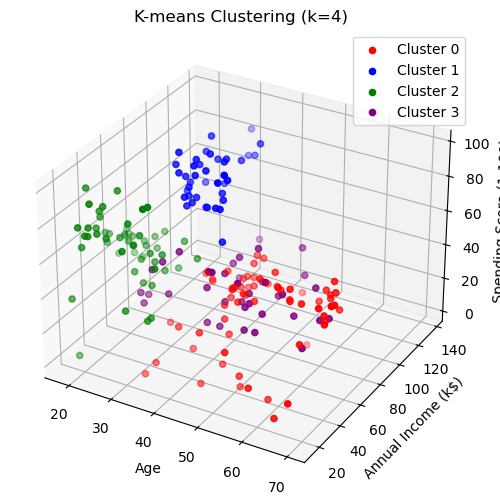

In [8]:
# Visualize the clusters (example for 3D scatter plot)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green', 'purple']  # Example colors for clusters

for cluster_id, color in zip(range(4), colors):
    cluster_data = data[data['Cluster'] == cluster_id]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               c=color, label=f'Cluster {cluster_id}', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('K-means Clustering (k=4)')
ax.legend()

plt.show()


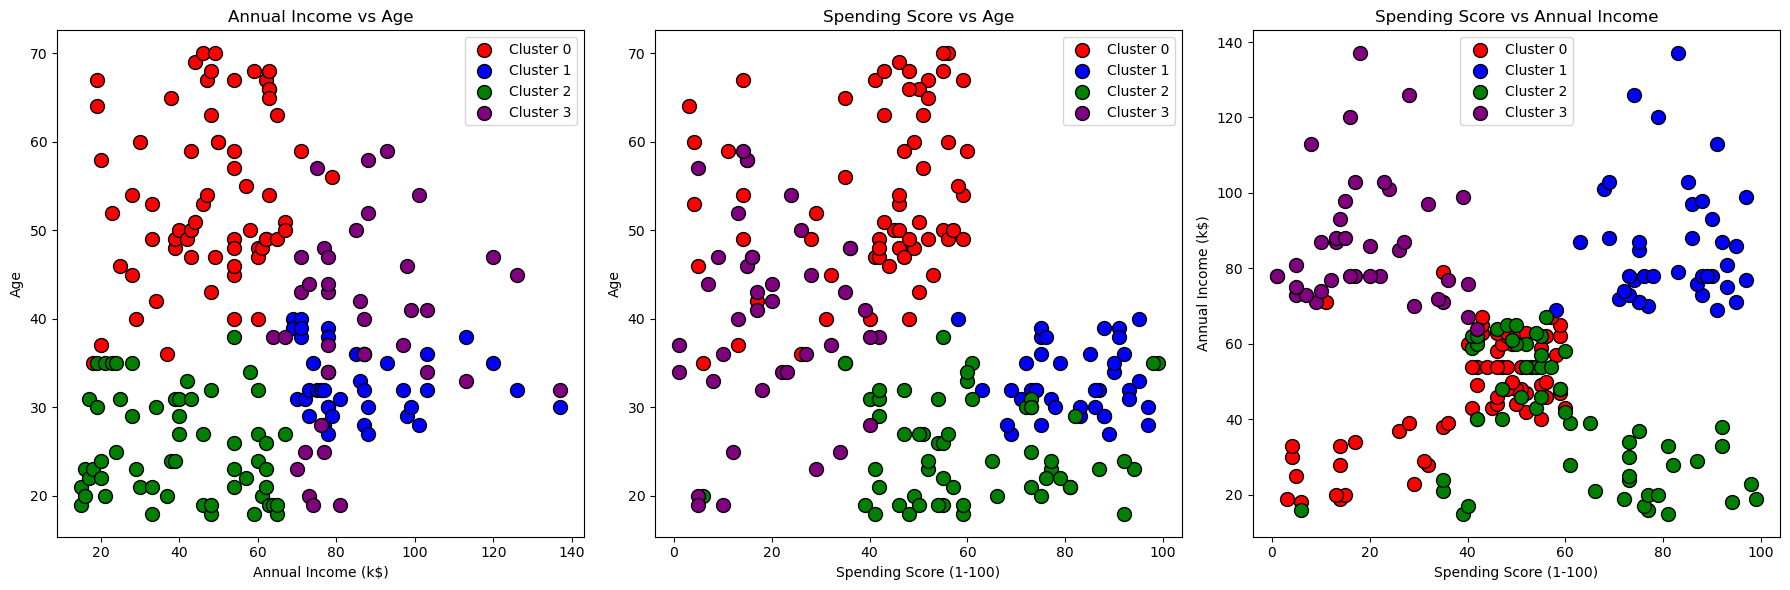

In [9]:
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].set_title('Annual Income vs Age')
for cluster_id, color in cluster_colors.items():
    cluster_data = data[data['Cluster'] == cluster_id]
    axs[0].scatter(cluster_data['Annual Income (k$)'], cluster_data['Age'],
                   color=color, label=f'Cluster {cluster_id}', edgecolor='black', s=100)
axs[0].set_xlabel('Annual Income (k$)')
axs[0].set_ylabel('Age')
axs[0].legend()

# Plot for (Spending Score, Age)
axs[1].set_title('Spending Score vs Age')
for cluster_id, color in cluster_colors.items():
    cluster_data = data[data['Cluster'] == cluster_id]
    axs[1].scatter(cluster_data['Spending Score (1-100)'], cluster_data['Age'],
                   color=color, label=f'Cluster {cluster_id}', edgecolor='black', s=100)
axs[1].set_xlabel('Spending Score (1-100)')
axs[1].set_ylabel('Age')
axs[1].legend()

# Plot for (Spending Score, Annual Income)
axs[2].set_title('Spending Score vs Annual Income')
for cluster_id, color in cluster_colors.items():
    cluster_data = data[data['Cluster'] == cluster_id]
    axs[2].scatter(cluster_data['Spending Score (1-100)'], cluster_data['Annual Income (k$)'],
                   color=color, label=f'Cluster {cluster_id}', edgecolor='black', s=100)
axs[2].set_xlabel('Spending Score (1-100)')
axs[2].set_ylabel('Annual Income (k$)')
axs[2].legend()

# Adjust layout and display the plots
plt.tight_layout()
plt.show()